In [9]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

# Use top_matrix from previous step (top 100 genes)
genome_dist = pdist(top_matrix.T, metric="euclidean")
genome_linkage = linkage(genome_dist, method="average")

# Cut tree into 12 clusters
n_clusters = 12
genome_clusters = fcluster(genome_linkage, n_clusters, criterion="maxclust")

# Create cluster assignment dataframe
cluster_df = pd.DataFrame({
    "genome": top_matrix.columns,
    "cluster": genome_clusters
})


In [10]:
cluster_fraction_matrix = []

for gene in top_matrix.index:
    row = []
    for cluster in sorted(cluster_df["cluster"].unique()):
        genomes_in_cluster = cluster_df[cluster_df["cluster"] == cluster]["genome"]
        subset = top_matrix.loc[gene, genomes_in_cluster]
        fraction = subset.mean()
        row.append(fraction)
    cluster_fraction_matrix.append(row)

cluster_fraction_df = pd.DataFrame(
    cluster_fraction_matrix,
    index=top_matrix.index,
    columns=sorted(cluster_df["cluster"].unique())
)


In [11]:
row_dist = pdist(cluster_fraction_df, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

row_dendro = dendrogram(row_linkage, no_plot=True)
row_order = row_dendro["leaves"]

cluster_fraction_df = cluster_fraction_df.iloc[row_order]


In [12]:
cmap="Blues"


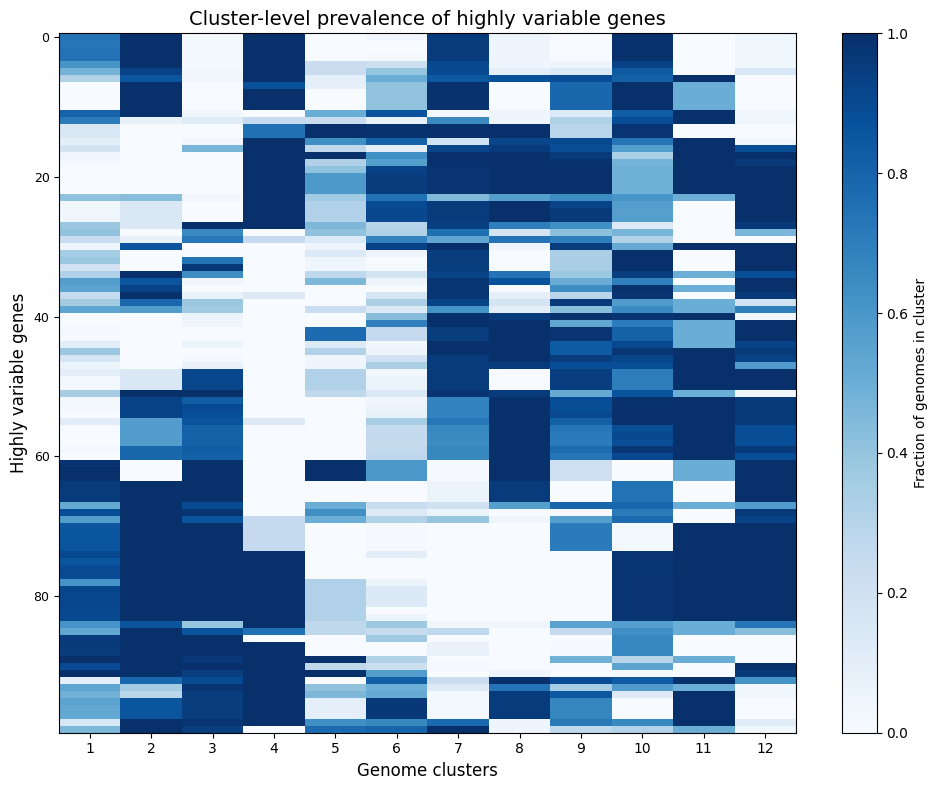

In [13]:
plt.figure(figsize=(10,8))

plt.imshow(cluster_fraction_df, aspect="auto", cmap="Blues")

plt.xlabel("Genome clusters", fontsize=12)
plt.ylabel("Highly variable genes", fontsize=12)
plt.title("Cluster-level prevalence of highly variable genes", fontsize=14)

plt.colorbar(label="Fraction of genomes in cluster")

plt.xticks(
    ticks=range(len(cluster_fraction_df.columns)),
    labels=cluster_fraction_df.columns,
    fontsize=10
)

plt.yticks(fontsize=9)

plt.tight_layout()

plt.savefig("Figure_5_Population_Diversity_Drivers_Clustered.png", dpi=300, bbox_inches="tight")
plt.savefig("Figure_5_Population_Diversity_Drivers_Clustered.pdf", bbox_inches="tight")

plt.show()


In [16]:
import os

for f in os.listdir():
    print(f)


Figure_1_Rarefaction.png
Figure_2_HeapsLaw.png
Table_SX_Genome_Cluster_Assignments.tsv
gene_presence_absence_backup.xlsx
pan_genome_reference_proteins.fa
combined_protein_cdhit_out.txt.clstr
Figure_1_Rarefaction.pdf
Figure_2_HeapsLaw.pdf
Heaps Law.ipynb
Figure_5_clustered_variable_genes.pdf
Figure_4_histogram_bin_counts.csv
.DS_Store
Heaps_law_fit_parameters.csv
struct_presence_absence.Rtab
Figure_5_clustered_variable_genes.png
pre_filt_graph.gml
Rarefaction.ipynb
Pangenome_structure_gene_level_table.csv
Figure_4_gene_frequency_compartments.csv
Pangenome structure.ipynb
Heaps_law_pan_accumulation_curve.csv
gene_presence_absence.Rtab
summary_statistics.txt
Figure_5_Population_Diversity_Drivers_Clustered.png
Figure_5_Population_Diversity_Drivers_Clustered.pdf
Figure_4_Bimodal_prevalence.pdf
Pangenome_structure_summary_table.csv
Table_SX_Cluster_Level_Presence_of_Highly_Variable_Genes.tsv
gene_presence_absence.csv
Figure_4_Bimodal_prevalence.png
Variable genes.ipynb
Galaxy41597-[eggNOG Ma

In [17]:
import pandas as pd

eggnog = pd.read_csv("Galaxy41597-[eggNOG Mapper on dataset 41594_ annotations].tabular", sep="\t", comment="#")

print(eggnog.columns)
eggnog.head()


Index(['group_4255', '525268.HMPREF0308_2248', '2.94e-78', '233.0',
       '2DX2W@1|root,34344@2|Bacteria,2H17I@201174|Actinobacteria,22NZE@1653|Corynebacteriaceae',
       '201174|Actinobacteria', '-', '-.1', '-.2', '-.3', '-.4', '-.5', '-.6',
       '-.7', '-.8', '-.9', '-.10', '-.11', '-.12', '-.13', '-.14'],
      dtype='str')


,group_4255,525268.HMPREF0308_2248,2.94e-78,233.0,"2DX2W@1|root,34344@2|Bacteria,2H17I@201174|Actinobacteria,22NZE@1653|Corynebacteriaceae",201174|Actinobacteria,-,-.1,-.2,-.3,...,-.5,-.6,-.7,-.8,-.9,-.10,-.11,-.12,-.13,-.14
0,hin,525268.HMPREF0308_1348,3.940000e-124,355.0,"COG1961@1|root,COG1961@2|Bacteria,2GNP3@201174...",201174|Actinobacteria,L,"Site-specific recombinases, DNA invertase Pin ...",-,-,...,-,-,-,-,-,-,-,-,-,"HTH_7,Resolvase"
1,crcB_1,525268.HMPREF0308_0327,6.260000e-87,255.0,"COG0239@1|root,COG0239@2|Bacteria,2GX3X@201174...",201174|Actinobacteria,D,Important for reducing fluoride concentration ...,crcB,-,...,ko:K06199,-,-,-,-,"ko00000,ko02000","1.A.43.1,1.A.43.2,1.A.43.3",-,-,CRCB
2,crcB_2,525268.HMPREF0308_0328,1.280000e-63,194.0,"COG0239@1|root,COG0239@2|Bacteria,2HTHZ@201174...",201174|Actinobacteria,D,Important for reducing fluoride concentration ...,ccrB,-,...,ko:K06199,-,-,-,-,"ko00000,ko02000","1.A.43.1,1.A.43.2,1.A.43.3",-,-,CRCB
3,fdhA,525268.HMPREF0308_0018,1.050000e-135,384.0,"COG0243@1|root,COG0243@2|Bacteria,2GJ7X@201174...",201174|Actinobacteria,C,"formate dehydrogenase, alpha subunit",fdhA,-,...,ko:K00123,"ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,R00519,RC02796,"ko00000,ko00001,ko01000",-,-,-,Molybdop_Fe4S4
4,fdoH,525268.HMPREF0308_0020,8.840000e-269,734.0,"COG0437@1|root,COG0437@2|Bacteria,2I2DV@201174...",201174|Actinobacteria,C,COG0437 Fe-S-cluster-containing hydrogenase co...,hybA,-,...,ko:K00124,"ko00630,ko00680,ko01100,ko01120,ko01200,map006...",-,R00519,RC02796,"ko00000,ko00001",-,-,-,"Fer4_11,Fer4_3,Fer4_4,Fer4_7"


In [20]:
import pandas as pd

eggnog = pd.read_csv("Galaxy41597-[eggNOG Mapper on dataset 41594_ annotations].tabular", sep="\t")

print(eggnog.columns)



Index(['#query', 'seed_ortholog', 'evalue', 'score', 'eggNOG_OGs',
       'max_annot_lvl', 'COG_category', 'Description', 'Preferred_name', 'GOs',
       'EC', 'KEGG_ko', 'KEGG_Pathway', 'KEGG_Module', 'KEGG_Reaction',
       'KEGG_rclass', 'BRITE', 'KEGG_TC', 'CAZy', 'BiGG_Reaction', 'PFAMs'],
      dtype='str')


In [21]:
eggnog = pd.read_csv("Galaxy41597-[eggNOG Mapper on dataset 41594_ annotations].tabular", sep="\t")

# Keep only relevant columns
eggnog_clean = eggnog[["#query", "COG_category", "Description"]].copy()

# Rename for consistency
eggnog_clean = eggnog_clean.rename(columns={"#query": "gene_id"})

# Fill missing COG values
eggnog_clean["COG_category"] = eggnog_clean["COG_category"].fillna("Unknown")

# If multiple COG letters, keep first one only
eggnog_clean["COG_category"] = eggnog_clean["COG_category"].astype(str).str[0]

# Drop duplicate gene IDs
eggnog_clean = eggnog_clean.drop_duplicates(subset="gene_id")

print(eggnog_clean.head())
print("Total annotated genes:", eggnog_clean.shape[0])


      gene_id COG_category                                        Description
0  group_4255            -                                                  -
1         hin            L  Site-specific recombinases, DNA invertase Pin ...
2      crcB_1            D  Important for reducing fluoride concentration ...
3      crcB_2            D  Important for reducing fluoride concentration ...
4        fdhA            C               formate dehydrogenase, alpha subunit
Total annotated genes: 4927


In [22]:
eggnog_clean.to_csv("eggnog_cleaned.csv", index=False)


In [24]:
print(cluster_fraction_df.index.name)



Gene


In [25]:
annotated = cluster_fraction_df.reset_index().merge(
    eggnog_clean,
    left_on="Gene",
    right_on="gene_id",
    how="left"
)

annotated = annotated.set_index("Gene")


In [26]:
print("Missing annotations:",
      annotated["COG_category"].isna().sum())

print("Total rows:", annotated.shape[0])


Missing annotations: 31
Total rows: 100


In [27]:
new_labels = []

for _, row in annotated.iterrows():
    gene = row.name
    cog = row["COG_category"]
    
    if pd.isna(cog):
        cog = "?"
    
    label = f"{gene} [{cog}]"
    new_labels.append(label)

annotated.index = new_labels


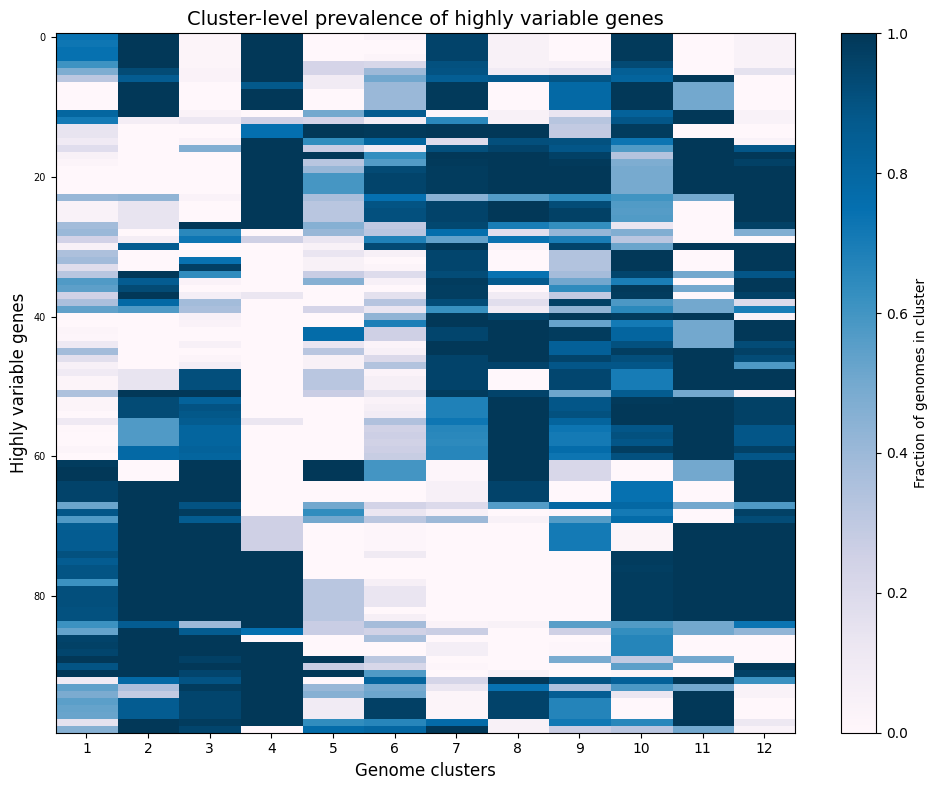

In [28]:
plt.figure(figsize=(10,8))

plt.imshow(annotated.drop(columns=["gene_id","COG_category","Description"], errors="ignore"),
           aspect="auto",
           cmap="PuBu")

plt.xlabel("Genome clusters", fontsize=12)
plt.ylabel("Highly variable genes", fontsize=12)
plt.title("Cluster-level prevalence of highly variable genes", fontsize=14)

plt.colorbar(label="Fraction of genomes in cluster")

plt.xticks(
    ticks=range(len(cluster_fraction_df.columns)),
    labels=cluster_fraction_df.columns,
    fontsize=10
)

plt.yticks(fontsize=7)

plt.tight_layout()

plt.savefig("Figure_5_Population_Diversity_Drivers_Annotated.png",
            dpi=300, bbox_inches="tight")
plt.savefig("Figure_5_Population_Diversity_Drivers_Annotated.pdf",
            bbox_inches="tight")

plt.show()


In [29]:
print(annotated.index[:10])


Index(['group_1361 [T]', 'group_725 [K]', 'degU~~~narL [K]', 'group_1325 [?]',
       'group_148 [?]', 'group_3334 [?]', 'group_2383 [L]', 'group_3369 [K]',
       'group_1066 [J]', 'group_589 [S]'],
      dtype='str')


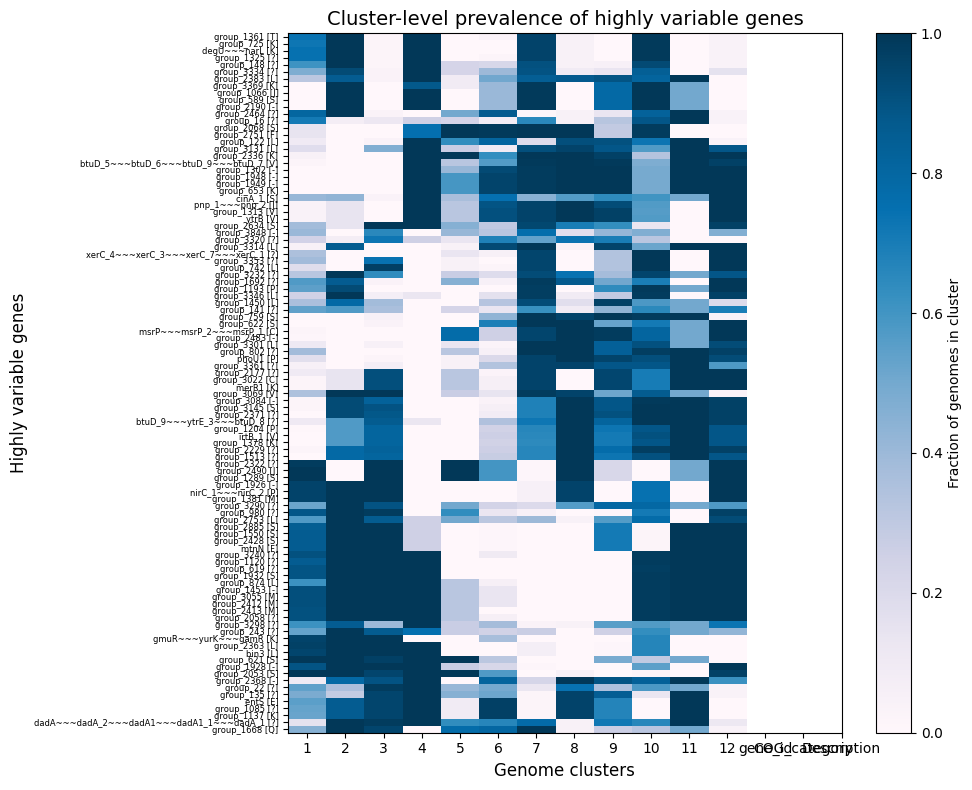

In [30]:
plt.figure(figsize=(10,8))

plt.imshow(
    annotated.drop(columns=["gene_id","COG_category","Description"], errors="ignore"),
    aspect="auto",
    cmap="PuBu"
)

plt.xlabel("Genome clusters", fontsize=12)
plt.ylabel("Highly variable genes", fontsize=12)
plt.title("Cluster-level prevalence of highly variable genes", fontsize=14)

plt.colorbar(label="Fraction of genomes in cluster")

plt.xticks(
    ticks=range(len(annotated.columns)),
    labels=annotated.columns,
    fontsize=10
)

plt.yticks(
    ticks=range(len(annotated.index)),
    labels=annotated.index,
    fontsize=6   # small but readable
)

plt.tight_layout()

plt.savefig("Figure_5_Population_Diversity_Drivers_Annotated.png",
            dpi=300, bbox_inches="tight")
plt.savefig("Figure_5_Population_Diversity_Drivers_Annotated.pdf",
            bbox_inches="tight")

plt.show()


In [31]:
top_n = 50

top_genes = var_df.head(top_n)["gene_id"]

top_matrix = matrix.loc[top_genes]


In [32]:
cluster_fraction_matrix = []

for gene in top_matrix.index:
    row = []
    for cluster in sorted(cluster_df["cluster"].unique()):
        genomes_in_cluster = cluster_df[cluster_df["cluster"] == cluster]["genome"]
        subset = top_matrix.loc[gene, genomes_in_cluster]
        row.append(subset.mean())
    cluster_fraction_matrix.append(row)

cluster_fraction_df = pd.DataFrame(
    cluster_fraction_matrix,
    index=top_matrix.index,
    columns=sorted(cluster_df["cluster"].unique())
)


In [33]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

row_dist = pdist(cluster_fraction_df, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

row_dendro = dendrogram(row_linkage, no_plot=True)
row_order = row_dendro["leaves"]

cluster_fraction_df = cluster_fraction_df.iloc[row_order]


In [34]:
annotated = cluster_fraction_df.reset_index().merge(
    eggnog_clean,
    left_on="Gene",
    right_on="gene_id",
    how="left"
)

annotated = annotated.set_index("Gene")


In [35]:
new_labels = []

for gene, row in annotated.iterrows():
    cog = row["COG_category"]
    if pd.isna(cog):
        cog = "?"
    new_labels.append(f"{gene} [{cog}]")

annotated.index = new_labels


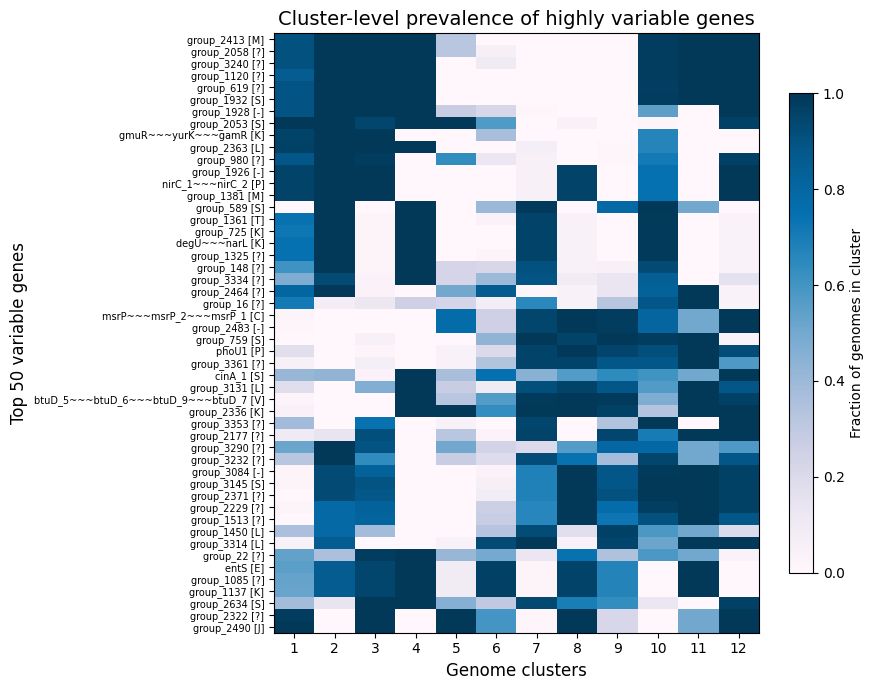

In [37]:
plt.figure(figsize=(9,7))

plt.imshow(
    annotated.drop(columns=["gene_id","COG_category","Description"], errors="ignore"),
    aspect="auto",
    cmap="PuBu"
)

plt.xlabel("Genome clusters", fontsize=12)
plt.ylabel("Top 50 variable genes", fontsize=12)
plt.title("Cluster-level prevalence of highly variable genes", fontsize=14)

plt.colorbar(label="Fraction of genomes in cluster", shrink=0.8)


plt.xticks(
    ticks=range(len(cluster_fraction_df.columns)),
    labels=cluster_fraction_df.columns,
    fontsize=10
)

plt.yticks(
    ticks=range(len(annotated.index)),
    labels=annotated.index,
    fontsize=7
)

plt.tight_layout()

plt.savefig("Figure_5_Top50_clustered_variable_genes.png",
            dpi=300, bbox_inches="tight")
plt.savefig("Figure_5_Top50_clustered_variable_genes.pdf",
            bbox_inches="tight")

plt.show()


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# Load Panaroo Rtab
rtab = pd.read_csv("gene_presence_absence.Rtab", sep="\t")

# Build binary matrix
matrix = rtab.iloc[:, 1:]
matrix = (matrix > 0).astype(int)
matrix.index = rtab.iloc[:, 0]

n_genomes = matrix.shape[1]

print("Gene families:", matrix.shape[0])
print("Genomes:", matrix.shape[1])


Gene families: 6361
Genomes: 839


In [39]:
gene_freq = matrix.sum(axis=1) / n_genomes
gene_variance = gene_freq * (1 - gene_freq)

var_df = pd.DataFrame({
    "gene_id": matrix.index,
    "frequency": gene_freq.values,
    "variance": gene_variance.values
}).sort_values(by="variance", ascending=False)

top_n = 50
top_genes = var_df.head(top_n)["gene_id"]

top_matrix = matrix.loc[top_genes]


In [40]:
var_df.head(50).to_csv("Figure_5_top50_variable_genes_ranked.csv", index=False)


In [41]:
genome_dist = pdist(top_matrix.T, metric="euclidean")
genome_linkage = linkage(genome_dist, method="average")

n_clusters = 12
genome_clusters = fcluster(genome_linkage, n_clusters, criterion="maxclust")

cluster_df = pd.DataFrame({
    "genome": top_matrix.columns,
    "cluster": genome_clusters
})


In [42]:
cluster_df.to_csv("Figure_5_genome_cluster_assignments.csv", index=False)


In [43]:
cluster_fraction_matrix = []

for gene in top_matrix.index:
    row = []
    for cluster in sorted(cluster_df["cluster"].unique()):
        genomes_in_cluster = cluster_df[cluster_df["cluster"] == cluster]["genome"]
        row.append(top_matrix.loc[gene, genomes_in_cluster].mean())
    cluster_fraction_matrix.append(row)

cluster_fraction_df = pd.DataFrame(
    cluster_fraction_matrix,
    index=top_matrix.index,
    columns=sorted(cluster_df["cluster"].unique())
)


In [44]:
cluster_fraction_df.to_csv("Figure_5_cluster_fraction_matrix.csv")


In [45]:
row_dist = pdist(cluster_fraction_df, metric="euclidean")
row_linkage = linkage(row_dist, method="average")

row_dendro = dendrogram(row_linkage, no_plot=True)
row_order = row_dendro["leaves"]

cluster_fraction_df = cluster_fraction_df.iloc[row_order]


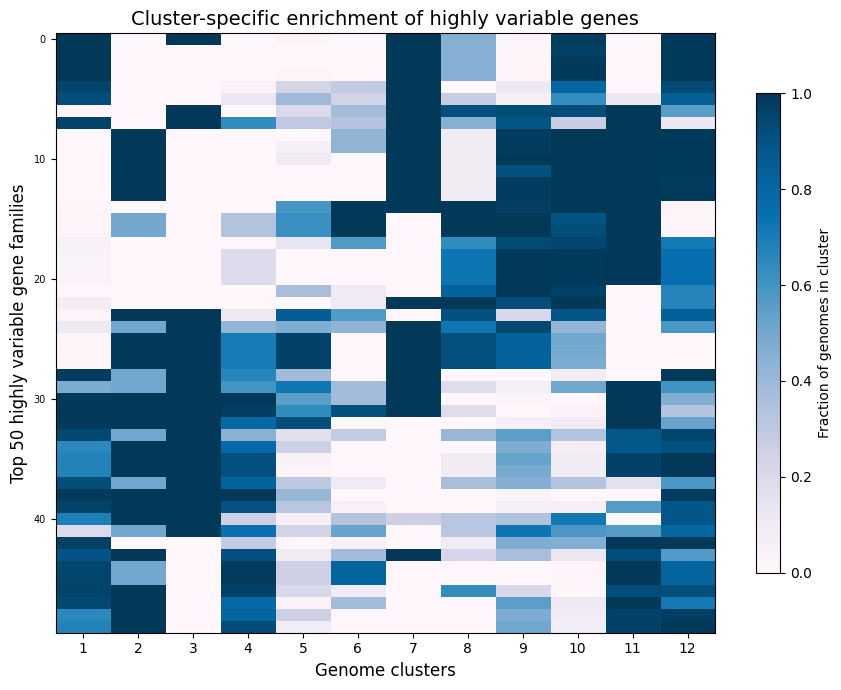

In [46]:
plt.figure(figsize=(9,7))

plt.imshow(cluster_fraction_df, aspect="auto", cmap="PuBu")

plt.xlabel("Genome clusters", fontsize=12)
plt.ylabel("Top 50 highly variable gene families", fontsize=12)
plt.title("Cluster-specific enrichment of highly variable genes", fontsize=14)

plt.colorbar(label="Fraction of genomes in cluster", shrink=0.8)

plt.xticks(
    ticks=range(len(cluster_fraction_df.columns)),
    labels=cluster_fraction_df.columns,
    fontsize=10
)

plt.yticks(fontsize=7)

plt.tight_layout()

plt.savefig("Figure_5_Top50_clustered_variable_genes.png",
            dpi=300, bbox_inches="tight")
plt.savefig("Figure_5_Top50_clustered_variable_genes.pdf",
            bbox_inches="tight")

plt.show()


In [47]:
var_df.to_csv(
    "Table_Variable_Gene_Ranking_full.csv",
    index=False
)


In [48]:
var_df.head(50).to_csv(
    "Table_Top50_variable_genes.csv",
    index=False
)


In [49]:
cluster_df.to_csv(
    "Table_Genome_cluster_assignments.csv",
    index=False
)


In [50]:
cluster_fraction_df.to_csv(
    "Table_Top50_cluster_fraction_matrix.csv"
)
